# **Problem Statement**

  ## Develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

In [1]:
#Download the given laon dataset
!gdown 10LbSIBXDLlhiCZlUdT5ei6p_j5CZMuQg

Downloading...
From: https://drive.google.com/uc?id=10LbSIBXDLlhiCZlUdT5ei6p_j5CZMuQg
To: /content/loan.csv
100% 16.3M/16.3M [00:00<00:00, 18.0MB/s]


In [2]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# libraries to perform stats
import scipy.stats as stats

In [3]:
# Read the data from a csv file
loan_df = pd.read_csv("/content/loan.csv")

In [4]:
loan_df.shape

(148670, 20)

In [5]:
loan_df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'occupancy_type', 'income',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'LTV',
       'Region', 'Status'],
      dtype='object')

In [6]:
#ID is a field which is just an identifier and drop the column

loan_df = loan_df.drop('ID', axis=1)

In [7]:
loan_df.shape

(148670, 19)

**As expected the ID field is removed from the dataset**

In [8]:
loan_df.year.isna().sum()

0

In [9]:
loan_df.year.nunique()

1

In [10]:
loan_df.year.unique()

array([2019])

In [11]:
#Year is containing only 2019 a field which is just an identifier to understand the entire data belongs to only 2019 and no much insights possible so drop the column

loan_df = loan_df.drop('year', axis=1)

In [12]:
loan_df.shape

(148670, 18)

**As expected the year field is removed from the dataset**

In [13]:
#Check whether there is duplicate data

print("Duplicate rows:")
print(loan_df.duplicated().sum())

Duplicate rows:
2


In [14]:
loan_df[loan_df.duplicated(keep=False)]

,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
43,cf,Male,type2,p4,b/c,236500,NaN,NaN,248000.0,pr,3120.0,CRIF,673,CIB,35-44,95.362903,central,1
38398,cf,Male,type2,p4,b/c,236500,NaN,NaN,248000.0,pr,3120.0,CRIF,673,CIB,35-44,95.362903,central,1
132000,cf,Sex Not Available,type2,p4,b/c,216500,NaN,NaN,NaN,pr,0.0,EQUI,684,EXP,35-44,NaN,south,1
146837,cf,Sex Not Available,type2,p4,b/c,216500,NaN,NaN,NaN,pr,0.0,EQUI,684,EXP,35-44,NaN,south,1


In [15]:
#Drop the 2 duplicate rows retain the first rows which is the default option

loan_df.drop_duplicates(inplace=True)

In [16]:
loan_df.shape

(148668, 18)

In [17]:
loan_df.head()

,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


In [18]:
#Determine the Categorical v/s Numerical Columns for further analysis.

categorical_cols = ['Status', 'loan_limit', 'Gender', 'loan_type', 'loan_purpose', 'business_or_commercial', 'occupancy_type',
                    'credit_type', 'co-applicant_credit_type', 'age', 'Region' ]
numerical_cols = ['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value', 'income', 'LTV']


# **Missing Values**

In [19]:
def categorical_cols_values_info(column):
  # Count of missing values
  missing_count = loan_df[column].isnull().sum()

  # Percentage of missing values
  total_count = len(loan_df[column])
  missing_percentage = (missing_count / total_count) * 100

  # Unique values and their counts
  unique_values = loan_df[column].value_counts(normalize=True, dropna=False) * 100
  unique_values = unique_values.round(2)

  grouby_values = loan_df.groupby(column)['Status'].value_counts(normalize=True, dropna=False) * 100
  grouby_values = grouby_values.round(2)

  # Print the results
  print(f"Missing Values Count: {missing_count}")
  print(f"Percentage of Missing Values: {missing_percentage:.2f}%")
  print(f"Total Size of Column: {total_count}")
  print("\nUnique Values and their Counts:")
  print(unique_values)
  print(grouby_values)

  if missing_count > 0:
    print((loan_df[loan_df[column].isna()]['Status'].value_counts(normalize=True) * 100).round(2))

In [20]:
def numerical_cols_values_info(column):
  # Count of missing values
  missing_count = loan_df[column].isnull().sum()

  # Percentage of missing values
  total_count = len(loan_df[column])
  defaulter_count = len(loan_df[loan_df['Status'] == 1])
  missing_percentage = (missing_count / total_count) * 100
  missing_percentage_df = (missing_count / defaulter_count) * 100

  # Print the results
  print(f"Missing Values Count: {missing_count}")
  print(f"Percentage of Missing Values: {missing_percentage:.2f}%")
  print(f"Total Size of Column: {total_count}")

  if missing_count > 0:
    print((loan_df[loan_df[column].isna()]['Status'].value_counts(normalize=True) * 100).round(2))
    print(f"Percentage of Missing Values w.r.t Defaulter: {missing_percentage_df:.2f}%")

In [21]:
categorical_cols_values_info("loan_limit")

Missing Values Count: 3344
Percentage of Missing Values: 2.25%
Total Size of Column: 148668

Unique Values and their Counts:
loan_limit
cf     91.04
ncf     6.71
NaN     2.25
Name: proportion, dtype: float64
loan_limit  Status
cf          0         76.03
            1         23.97
ncf         0         66.79
            1         33.21
Name: proportion, dtype: float64
Status
0    73.65
1    26.35
Name: proportion, dtype: float64


In [22]:
categorical_cols_values_info("Gender")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668

Unique Values and their Counts:
Gender
Male                 28.48
Joint                27.85
Sex Not Available    25.33
Female               18.34
Name: proportion, dtype: float64
Gender             Status
Female             0         74.88
                   1         25.12
Joint              0         80.84
                   1         19.16
Male               0         73.81
                   1         26.19
Sex Not Available  0         71.41
                   1         28.59
Name: proportion, dtype: float64


In [23]:
categorical_cols_values_info("loan_type")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668

Unique Values and their Counts:
loan_type
type1    76.12
type2    13.96
type3     9.91
Name: proportion, dtype: float64
loan_type  Status
type1      0         77.23
           1         22.77
type2      0         65.46
           1         34.54
type3      0         74.94
           1         25.06
Name: proportion, dtype: float64


In [24]:
categorical_cols_values_info("loan_purpose")

Missing Values Count: 134
Percentage of Missing Values: 0.09%
Total Size of Column: 148668

Unique Values and their Counts:
loan_purpose
p3     37.62
p4     36.86
p1     23.23
p2      2.20
NaN     0.09
Name: proportion, dtype: float64
loan_purpose  Status
p1            0         74.12
              1         25.88
p2            0         66.92
              1         33.08
p3            0         74.98
              1         25.02
p4            0         77.03
              1         22.97
Name: proportion, dtype: float64
Status
0    73.88
1    26.12
Name: proportion, dtype: float64


In [25]:
categorical_cols_values_info("business_or_commercial")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668

Unique Values and their Counts:
business_or_commercial
nob/c    86.04
b/c      13.96
Name: proportion, dtype: float64
business_or_commercial  Status
b/c                     0         65.46
                        1         34.54
nob/c                   0         76.96
                        1         23.04
Name: proportion, dtype: float64


In [26]:
categorical_cols_values_info("occupancy_type")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668

Unique Values and their Counts:
occupancy_type
pr    92.96
ir     4.94
sr     2.10
Name: proportion, dtype: float64
occupancy_type  Status
ir              0         70.01
                1         29.99
pr              0         75.70
                1         24.30
sr              0         72.87
                1         27.13
Name: proportion, dtype: float64


In [27]:
categorical_cols_values_info("credit_type")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668

Unique Values and their Counts:
credit_type
CIB     32.39
CRIF    29.53
EXP     27.79
EQUI    10.29
Name: proportion, dtype: float64
credit_type  Status
CIB          0         84.20
             1         15.80
CRIF         0         83.77
             1         16.23
EQUI         1         99.99
             0          0.01
EXP          0         84.01
             1         15.99
Name: proportion, dtype: float64


In [28]:
categorical_cols_values_info("co-applicant_credit_type")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668

Unique Values and their Counts:
co-applicant_credit_type
CIB    50.04
EXP    49.96
Name: proportion, dtype: float64
co-applicant_credit_type  Status
CIB                       0         81.57
                          1         18.43
EXP                       0         69.14
                          1         30.86
Name: proportion, dtype: float64


In [29]:
categorical_cols_values_info("age")

Missing Values Count: 200
Percentage of Missing Values: 0.13%
Total Size of Column: 148668

Unique Values and their Counts:
age
45-54    23.35
35-44    22.07
55-64    21.88
65-74    13.95
25-34    12.88
>74       4.83
<25       0.90
NaN       0.13
Name: proportion, dtype: float64
age    Status
25-34  0         77.81
       1         22.19
35-44  0         77.73
       1         22.27
45-54  0         75.95
       1         24.05
55-64  0         74.11
       1         25.89
65-74  0         73.14
       1         26.86
<25    0         71.05
       1         28.95
>74    0         69.99
       1         30.01
Name: proportion, dtype: float64
Status
1    100.0
Name: proportion, dtype: float64


In [30]:
categorical_cols_values_info("Region")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668

Unique Values and their Counts:
Region
North         50.26
south         43.06
central        5.85
North-East     0.83
Name: proportion, dtype: float64
Region      Status
North       0         77.49
            1         22.51
North-East  0         69.55
            1         30.45
central     0         72.47
            1         27.53
south       0         73.37
            1         26.63
Name: proportion, dtype: float64


In [31]:
numerical_cols_values_info("loan_amount")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668


In [32]:
numerical_cols_values_info("rate_of_interest")

Missing Values Count: 36437
Percentage of Missing Values: 24.51%
Total Size of Column: 148668
Status
1    100.0
Name: proportion, dtype: float64
Percentage of Missing Values w.r.t Defaulter: 99.45%


In [33]:
numerical_cols_values_info("Upfront_charges")

Missing Values Count: 39640
Percentage of Missing Values: 26.66%
Total Size of Column: 148668
Status
1    92.04
0     7.96
Name: proportion, dtype: float64
Percentage of Missing Values w.r.t Defaulter: 108.20%


In [34]:
numerical_cols_values_info("property_value")

Missing Values Count: 15097
Percentage of Missing Values: 10.15%
Total Size of Column: 148668
Status
1    99.99
0     0.01
Name: proportion, dtype: float64
Percentage of Missing Values w.r.t Defaulter: 41.21%


In [35]:
numerical_cols_values_info("income")

Missing Values Count: 9150
Percentage of Missing Values: 6.15%
Total Size of Column: 148668
Status
0    86.46
1    13.54
Name: proportion, dtype: float64
Percentage of Missing Values w.r.t Defaulter: 24.97%


In [36]:
numerical_cols_values_info("LTV")

Missing Values Count: 15097
Percentage of Missing Values: 10.15%
Total Size of Column: 148668
Status
1    99.99
0     0.01
Name: proportion, dtype: float64
Percentage of Missing Values w.r.t Defaulter: 41.21%


In [37]:
numerical_cols_values_info("Credit_Score")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668


In [38]:
categorical_cols_values_info("Status")

Missing Values Count: 0
Percentage of Missing Values: 0.00%
Total Size of Column: 148668

Unique Values and their Counts:
Status
0    75.36
1    24.64
Name: proportion, dtype: float64
Status
0    100.0
1    100.0
Name: proportion, dtype: float64


**Summarization of Categorical features:**

* The dataset has 10 categorical features
* Only 3 features are having missing values in the range of 0.13% - 2.25% of total data
* Data distribution
  * 75.36% of laons are normal and 24.64% loans are default
  * 91% loans are Confirm/Fixed loan limit
  * 86% loans are non business/commercial loans
  * 76% loans are type1
  * 28.48% of loans are disbursed to Males and only 18% of loans to Females
  * 93% of loans are given to PR type occupancy
  * 37% of loans are given to each P3 and P4 type of loan purpose
  * 50% of loans are disbursed in North and 43% of loans in South
  * Only 6% of loans are given in Central
  * Customers are spread with 10% - 32% of 4 different credit types with Equifax being the least and CIBIL being highest but CRIF Center for Research in International Finance High Mark and Experian follows with about 28% share
  * About 22% of loans are given to the customers in the age range from 35 - 64 years
  * About 13% of loans are given to the customers in the age b/w 25 - 34 or 65 - 74.
  * Only 5% of loans are given to customers with age >74 and just 1% for age <25
  * Co applicant type is equally distributed between CIBIL and EXPERIAN

**Summarization of Numerical features:**

* The dataset has 6 categorical features
* Except loan amount feature all other features are having missing values in the range of 6.15% - 26.66% of total data
* Missing value Data distribution
  * 100% missing data for Rate of Interest, Property Value, LTV belongs to Defaulter loans
  * 87% missing data for Income belongs to Defaulter loans
  * 92% missing data for Upfront charges belongs to Defaulter loans

**As the most of the missing data belongs to defaulter loans, Imputation of missing values is challenging.**

* 100% missing data for Rate of Interest belongs to Defaulter loans and it represents 99.45% total defaulters population. As there is only 0.55% data points with defaulters having interest rate, whatever we impute this feature will not provide accurate insights.

* 92% missing data for Upfront charges belongs to Defaulter loans population. As there is only 8% data points with defaulters having Upfront charges, whatever we impute this feature will not provide accurate insights.

* 100% missing data for Property value belongs to Defaulter loans and it represents 41% total defaulters population. We have 59% data points with defaulters having Property value which we can use to impute this feature and it may not provide accurate insights.

* 87% missing data for Income value belongs to Defaulter loans and it represents 24% total defaulters population. We have 76% data points with defaulters having income value which we can use to impute this feature.

* 100% missing data for Life Time value belongs to Defaulter loans and it represents 41% total defaulters population. We have 59% data points with defaulters having Life Time value which we can use to impute this feature and it may not provide accurate insights.

# **Impute the Categorical features with Missing Values**

## **loan_purpose**

Verifying the distribution of missing values in the loan purpose with other features

In [39]:
loan_df[loan_df['loan_purpose'].isna()]['credit_type'].value_counts()

,count
credit_type,
CRIF,38
EXP,37
CIB,34
EQUI,25


In [40]:
loan_df[loan_df['loan_purpose'].isna()]['occupancy_type'].value_counts()

,count
occupancy_type,
pr,124
sr,5
ir,5


In [41]:
loan_df[loan_df['loan_purpose'].isna()]['business_or_commercial'].value_counts()

,count
business_or_commercial,
nob/c,104
b/c,30


In [42]:
loan_df[loan_df['loan_purpose'].isna()]['loan_type'].value_counts()

,count
loan_type,
type1,94
type2,30
type3,10


In [43]:
loan_df[loan_df['loan_purpose'].isna()]['Gender'].value_counts()

,count
Gender,
Male,42
Joint,41
Sex Not Available,27
Female,24


#loan_purpose missing values distribution is more uniform w.r.t credit_type so we will impute the mode using credit type

credit_type
* CRIF	38
* EXP	37
* CIB	34
* EQUI	25

In [44]:
(loan_df[loan_df['loan_purpose'].isna()]['credit_type'].value_counts(normalize=True) * 100).round(2)

,proportion
credit_type,
CRIF,28.36
EXP,27.61
CIB,25.37
EQUI,18.66


In [45]:
(loan_df[~loan_df['loan_purpose'].isna()]['credit_type'].value_counts(normalize=True, dropna=False) * 100).round(2)

,proportion
credit_type,
CIB,32.40
CRIF,29.53
EXP,27.79
EQUI,10.28


### **Before Imputation**

In [46]:
(loan_df[~loan_df['loan_purpose'].isna()]['loan_purpose'].value_counts(normalize=True) * 100).round(2)

,proportion
loan_purpose,
p3,37.66
p4,36.89
p1,23.25
p2,2.20


In [47]:
loan_df['loan_purpose'] = loan_df.groupby('credit_type')['loan_purpose'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

### **After Imputation**

In [48]:
(loan_df[~loan_df['loan_purpose'].isna()]['loan_purpose'].value_counts(normalize=True) * 100).round(2)

,proportion
loan_purpose,
p3,37.67
p4,36.90
p1,23.23
p2,2.20


In [49]:
loan_df['loan_purpose'].isna().sum()

0

In [50]:
loan_df['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2'], dtype=object)

**Imputing the missing values of Loan Purpose has been uniformly distributed without affecting the original distirbution of data.**

## **Imputing the Age Feature**

In [51]:
loan_df[loan_df['age'].isna()]['Status'].value_counts()

,count
Status,
1,200


In [52]:
loan_df[loan_df['age'].isna()]['Region'].value_counts()

,count
Region,
south,200


In [53]:
loan_df[loan_df['age'].isna()]['credit_type'].value_counts()

,count
credit_type,
EQUI,200


In [54]:
loan_df[loan_df['age'].isna()]['Gender'].value_counts()

,count
Gender,
Sex Not Available,200


In [55]:
loan_df[loan_df['age'].isna()]['occupancy_type'].value_counts()

,count
occupancy_type,
pr,195
ir,4
sr,1


In [56]:
(loan_df[loan_df['age'].isna()]['occupancy_type'].value_counts(normalize=True) * 100).round(2)

,proportion
occupancy_type,
pr,97.5
ir,2.0
sr,0.5


In [57]:
(loan_df[~loan_df['age'].isna()]['occupancy_type'].value_counts(normalize=True) * 100).round(2)

,proportion
occupancy_type,
pr,92.95
ir,4.94
sr,2.11


In [58]:
loan_df[loan_df['age'].isna()]['business_or_commercial'].value_counts()

,count
business_or_commercial,
b/c,159
nob/c,41


In [59]:
(loan_df[loan_df['age'].isna()]['business_or_commercial'].value_counts(normalize=True) * 100).round(2)

,proportion
business_or_commercial,
b/c,79.5
nob/c,20.5


In [60]:
(loan_df[~loan_df['age'].isna()]['business_or_commercial'].value_counts(normalize=True) * 100).round(2)

,proportion
business_or_commercial,
nob/c,86.12
b/c,13.88


In [61]:
loan_df[loan_df['age'].isna()]['loan_type'].value_counts()

,count
loan_type,
type2,159
type1,36
type3,5


In [62]:
(loan_df[loan_df['age'].isna()]['loan_type'].value_counts(normalize=True) * 100).round(2)

,proportion
loan_type,
type2,79.5
type1,18.0
type3,2.5


In [63]:
(loan_df[~loan_df['age'].isna()]['loan_type'].value_counts(normalize=True) * 100).round(2)

,proportion
loan_type,
type1,76.20
type2,13.88
type3,9.92


### **Before Imputation**

In [64]:
(loan_df[~loan_df['age'].isna()]['age'].value_counts(normalize=True) * 100).round(2)

,proportion
age,
45-54,23.39
35-44,22.10
55-64,21.91
65-74,13.97
25-34,12.89
>74,4.83
<25,0.90


**Age missing values distribution is more uniform w.r.t loan_type so we will impute the mode using loan type**

In [65]:
loan_df['age'] = loan_df.groupby('loan_type')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

### **After Imputation**

In [66]:
(loan_df[~loan_df['age'].isna()]['age'].value_counts(normalize=True) * 100).round(2)

,proportion
age,
45-54,23.49
35-44,22.07
55-64,21.88
65-74,13.96
25-34,12.88
>74,4.83
<25,0.90


In [67]:
loan_df['age'].isna().sum()

0

In [68]:
loan_df['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25'],
      dtype=object)

**Imputing the missing values of Age has been uniformly distributed without affecting the original distirbution of data.**

## **Imputing Loan Limit**

In [69]:
loan_df[loan_df['loan_limit'].isna()]['Status'].value_counts()

,count
Status,
0,2463
1,881


In [70]:
loan_df[loan_df['loan_limit'].isna()]['Region'].value_counts()

,count
Region,
North,1706
south,1393
central,225
North-East,20


In [71]:
loan_df[loan_df['loan_limit'].isna()]['credit_type'].value_counts()

,count
credit_type,
CIB,1052
CRIF,1005
EXP,908
EQUI,379


In [72]:
loan_df[loan_df['loan_limit'].isna()]['occupancy_type'].value_counts()

,count
occupancy_type,
pr,3075
ir,193
sr,76


In [73]:
loan_df[loan_df['loan_limit'].isna()]['business_or_commercial'].value_counts()

,count
business_or_commercial,
nob/c,2799
b/c,545


In [74]:
loan_df[loan_df['loan_limit'].isna()]['loan_type'].value_counts()

,count
loan_type,
type1,2545
type2,545
type3,254


In [75]:
loan_df[loan_df['loan_limit'].isna()]['Gender'].value_counts()

,count
Gender,
Male,1000
Joint,887
Sex Not Available,806
Female,651


In [76]:
(loan_df[loan_df['loan_limit'].isna()]['Gender'].value_counts(normalize=True) * 100).round(2)

,proportion
Gender,
Male,29.90
Joint,26.53
Sex Not Available,24.10
Female,19.47


In [77]:
(loan_df[~loan_df['loan_limit'].isna()]['Gender'].value_counts(normalize=True) * 100).round(2)

,proportion
Gender,
Male,28.45
Joint,27.88
Sex Not Available,25.36
Female,18.31


**loan_limit missing values distro is little better uniform w.r.t Gender so we will impute the mode using Gender**

### **Before Imputing**

In [78]:
(loan_df[~loan_df['loan_limit'].isna()]['loan_limit'].value_counts(normalize=True) * 100).round(2)

,proportion
loan_limit,
cf,93.13
ncf,6.87


In [79]:
loan_df['loan_limit'] = loan_df.groupby('Gender')['loan_limit'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

### **After Imputing**

In [80]:
(loan_df[~loan_df['loan_limit'].isna()]['loan_limit'].value_counts(normalize=True) * 100).round(2)

,proportion
loan_limit,
cf,93.29
ncf,6.71


In [81]:
loan_df['loan_limit'].isna().sum()

0

In [82]:
loan_df['loan_limit'].unique()

array(['cf', 'ncf'], dtype=object)

**Imputing the missing values of Loan limit has been uniformly distributed without affecting the original distirbution of data.**

# **Impute the Numerical features with Missing Values**

In [83]:
loan_df.columns

Index(['loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'occupancy_type', 'income',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'LTV',
       'Region', 'Status'],
      dtype='object')

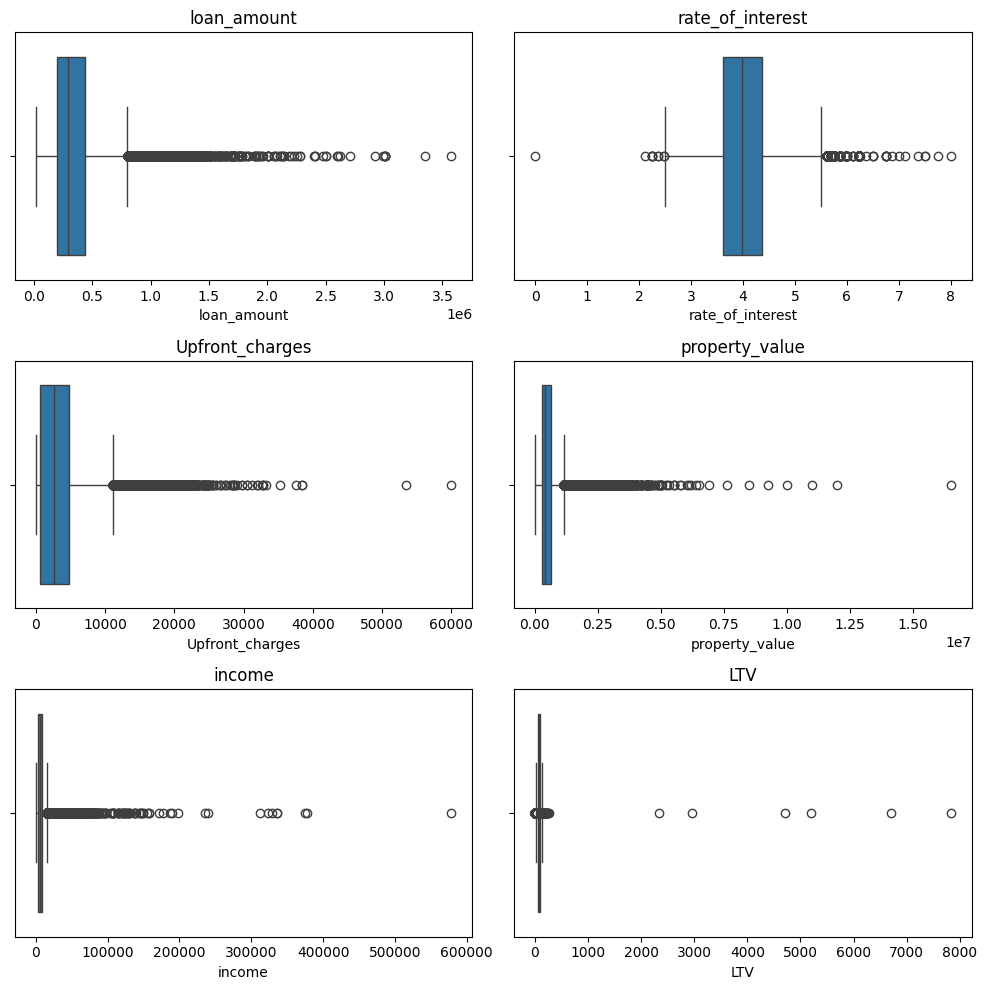

In [84]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
sns.boxplot(loan_df.iloc[:,5],ax=axs[0, 0],orient='h').set_title('loan_amount')
sns.boxplot(loan_df.iloc[:,6],ax=axs[0, 1],orient='h').set_title('rate_of_interest')
sns.boxplot(loan_df.iloc[:,7],ax=axs[1, 0],orient='h').set_title('Upfront_charges')
sns.boxplot(loan_df.iloc[:,8],ax=axs[1, 1],orient='h').set_title('property_value')
sns.boxplot(loan_df.iloc[:,10],ax=axs[2, 0],orient='h').set_title('income')
sns.boxplot(loan_df.iloc[:,15],ax=axs[2, 1],orient='h').set_title('LTV')
fig.tight_layout()

**All 6 numerical features are having huge amount of OUTLIERs. We should not use mean as the imputation technique and the outliers will have impact on the imputed values.**

## **Imputing Income Feature**

In [85]:
loan_df['income'].isna().sum()

9150

**Approach:**

Verify the combination of different features of missing values present in non missing values assuming the same characteristics of data points would have similar values.

The combination will be selected in different combinations to fill the missing values incrementally.

In [86]:
def check_feature_comb_to_impute_numerical_feature(col, col_list):
  # Separate DataFrames for missing and non-missing income values
  missing_col_df = loan_df[loan_df[col].isna()]
  non_missing_col_df = loan_df[loan_df[col].notna()]
  # Create a set of tuples for combinations of status and loan amount in non-missing income rows
  non_missing_combinations = set(non_missing_col_df[col_list].apply(tuple, axis=1))

  # Check if each combination of status and loan amount in missing income rows exists in non-missing income rows
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)

  print(f"Percentage of Missing Values will be imputed: {(len(missing_col_df[missing_col_df['combination_exists'] == True])/loan_df[col].isna().sum() * 100).round(2)}")


In [87]:
def apply_numerical_feature_imputation(col, col_list, loan_df):
  non_missing_col_df = loan_df[loan_df[col].notna()]
  non_missing_col_df = non_missing_col_df.groupby(col_list)[col].median().reset_index()
  # Merge DataFrames on the specified columns
  loan_df = pd.merge(loan_df, non_missing_col_df, how='left', on=col_list, suffixes=('', '_y'))

  # Fill missing values in column with values from 'col_y' column
  loan_df[col] = loan_df[col].fillna(loan_df[col+ '_y'])

  # Drop the extra 'col_y' column
  loan_df.drop(columns=[col+ '_y'], inplace=True)

  print(f"Percentage of Missing Values left: {(loan_df[col].isna().sum()/len(loan_df[col]) * 100).round(2)}")
  return loan_df

In [88]:
check_feature_comb_to_impute_numerical_feature('income', ['Region', 'business_or_commercial', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 44.14


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [89]:
loan_df = apply_numerical_feature_imputation('income', ['Region', 'business_or_commercial', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 3.44


In [90]:
check_feature_comb_to_impute_numerical_feature('income', ['Region', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 89.96


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [91]:
loan_df = apply_numerical_feature_imputation('income', ['Region', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.35


In [92]:
check_feature_comb_to_impute_numerical_feature('income', ['Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 98.83


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [93]:
loan_df = apply_numerical_feature_imputation('income', ['Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.0


In [94]:
check_feature_comb_to_impute_numerical_feature('income', ['loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 83.33


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [95]:
loan_df = apply_numerical_feature_imputation('income', ['loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.0


In [96]:
loan_df['income'] = loan_df.apply(lambda row: loan_df[loan_df['loan_amount'] == row['loan_amount']]['income'].median() if pd.isna(row['income']) else row['income'], axis=1)

In [97]:
loan_df['income'].isna().sum()

0

**After 5 rounds the income feature is imputed sucessfully**

## **Imputing Property Value Feature**

In [98]:
check_feature_comb_to_impute_numerical_feature('property_value', ['Region', 'business_or_commercial', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 83.86


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [99]:
loan_df = apply_numerical_feature_imputation('property_value', ['Region', 'business_or_commercial', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 1.64


In [100]:
check_feature_comb_to_impute_numerical_feature('property_value', ['Region', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 67.99


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [101]:
loan_df = apply_numerical_feature_imputation('property_value', ['Region', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.52


In [102]:
check_feature_comb_to_impute_numerical_feature('property_value', [ 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 86.79


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [103]:
loan_df = apply_numerical_feature_imputation('property_value', ['Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.07


In [104]:
check_feature_comb_to_impute_numerical_feature('property_value', [ 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 65.05


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [105]:
loan_df = apply_numerical_feature_imputation('property_value', ['loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.02


In [106]:
check_feature_comb_to_impute_numerical_feature('property_value', [ 'loan_amount'])

Percentage of Missing Values will be imputed: 80.56


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [107]:
loan_df['property_value'] = loan_df.apply(lambda row: loan_df[loan_df['loan_amount'] == row['loan_amount']]['property_value'].median() if pd.isna(row['property_value']) else row['property_value'], axis=1)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [108]:
loan_df['property_value'].isna().sum()

7

In [109]:
check_feature_comb_to_impute_numerical_feature('property_value', [ 'Status'])

Percentage of Missing Values will be imputed: 100.0


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [110]:
loan_df['property_value'] = loan_df.apply(lambda row: loan_df[loan_df['Status'] == row['Status']]['property_value'].median() if pd.isna(row['property_value']) else row['property_value'], axis=1)

In [111]:
loan_df['property_value'].isna().sum()

0

**After 6 rounds the property_value feature is imputed sucessfully**

## **Imputing Life Time Value Feature**

In [112]:
check_feature_comb_to_impute_numerical_feature('LTV', ['Region', 'business_or_commercial', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 83.86


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [113]:
loan_df = apply_numerical_feature_imputation('LTV', ['Region', 'business_or_commercial', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 1.64


In [114]:
check_feature_comb_to_impute_numerical_feature('LTV', ['Region', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 67.99


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [115]:
loan_df = apply_numerical_feature_imputation('LTV', ['Region', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.52


In [116]:
check_feature_comb_to_impute_numerical_feature('LTV', ['loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 63.72


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [117]:
loan_df = apply_numerical_feature_imputation('LTV', [ 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.19


In [118]:
check_feature_comb_to_impute_numerical_feature('LTV', [ 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 63.6


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [119]:
loan_df = apply_numerical_feature_imputation('LTV', [ 'Gender', 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.07


In [120]:
check_feature_comb_to_impute_numerical_feature('LTV', [ 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 65.05


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [121]:
loan_df = apply_numerical_feature_imputation('LTV', [ 'loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.02


In [122]:
loan_df['LTV'] = loan_df.apply(lambda row: loan_df[loan_df['loan_amount'] == row['loan_amount']]['LTV'].median() if pd.isna(row['LTV']) else row['LTV'], axis=1)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [123]:
loan_df['LTV'].isna().sum()

7

In [124]:
check_feature_comb_to_impute_numerical_feature('LTV', [ 'Status'])

Percentage of Missing Values will be imputed: 100.0


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [125]:
loan_df['LTV'] = loan_df.apply(lambda row: loan_df[loan_df['Status'] == row['Status']]['LTV'].median() if pd.isna(row['LTV']) else row['LTV'], axis=1)

In [126]:
loan_df['LTV'].isna().sum()

0

**After 6 rounds the LTV feature is imputed sucessfully**

## **Imputing Upfront Charges**

In [127]:
check_feature_comb_to_impute_numerical_feature('Upfront_charges', ['Region', 'business_or_commercial', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 8.47


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [128]:
check_feature_comb_to_impute_numerical_feature('Upfront_charges', ['Region','occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 8.47


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [129]:
check_feature_comb_to_impute_numerical_feature('Upfront_charges', ['Region','loan_type', 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 11.23


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [130]:
check_feature_comb_to_impute_numerical_feature('Upfront_charges', ['Region','Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 18.02


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [131]:
check_feature_comb_to_impute_numerical_feature('Upfront_charges', [ 'Gender', 'loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 18.17


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [132]:
check_feature_comb_to_impute_numerical_feature('Upfront_charges', ['loan_limit', 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 40.57


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [133]:
loan_df = apply_numerical_feature_imputation('Upfront_charges', ['loan_limit', 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 15.85


In [134]:
check_feature_comb_to_impute_numerical_feature('Upfront_charges', [ 'Status', 'loan_amount'])

Percentage of Missing Values will be imputed: 68.72


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [135]:
loan_df = apply_numerical_feature_imputation('Upfront_charges', [ 'Status', 'loan_amount'], loan_df)

Percentage of Missing Values left: 4.96


In [136]:
loan_df['Upfront_charges'] = loan_df.apply(lambda row: loan_df[loan_df['loan_amount'] == row['loan_amount']]['Upfront_charges'].median() if pd.isna(row['Upfront_charges']) else row['Upfront_charges'], axis=1)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [137]:
loan_df['Upfront_charges'].isna().sum()

54

In [138]:
loan_df['Upfront_charges'] = loan_df.apply(lambda row: loan_df[loan_df['Status'] == row['Status']]['Upfront_charges'].median() if pd.isna(row['Upfront_charges']) else row['Upfront_charges'], axis=1)

In [139]:
loan_df['Upfront_charges'].isna().sum()

0

**After 6 rounds the Upfront Charges feature is imputed sucessfully**

## **Imputing Rate of Interest**

In [140]:
check_feature_comb_to_impute_numerical_feature('rate_of_interest', ['Region', 'business_or_commercial', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'loan_amount'])

Percentage of Missing Values will be imputed: 93.47


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [141]:
loan_df = apply_numerical_feature_imputation('rate_of_interest', ['Region', 'business_or_commercial', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender', 'loan_limit', 'loan_amount'], loan_df)

Percentage of Missing Values left: 1.6


In [142]:
check_feature_comb_to_impute_numerical_feature('rate_of_interest', ['Region', 'loan_type', 'Gender', 'loan_limit', 'loan_amount'])

Percentage of Missing Values will be imputed: 70.69


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [143]:
loan_df = apply_numerical_feature_imputation('rate_of_interest', ['Region', 'loan_type', 'Gender', 'loan_limit', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.47


In [144]:
check_feature_comb_to_impute_numerical_feature('rate_of_interest', ['Region', 'Gender', 'loan_limit', 'loan_amount'])

Percentage of Missing Values will be imputed: 47.78


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [145]:
loan_df = apply_numerical_feature_imputation('rate_of_interest', ['Region', 'Gender', 'loan_limit', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.24


In [146]:
check_feature_comb_to_impute_numerical_feature('rate_of_interest', [ 'Gender', 'loan_limit', 'loan_amount'])

Percentage of Missing Values will be imputed: 52.2


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [147]:
loan_df = apply_numerical_feature_imputation('rate_of_interest', [ 'Gender', 'loan_limit', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.12


In [148]:
check_feature_comb_to_impute_numerical_feature('rate_of_interest', [ 'loan_limit', 'loan_amount'])

Percentage of Missing Values will be imputed: 63.79


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [149]:
loan_df = apply_numerical_feature_imputation('rate_of_interest', [ 'loan_limit', 'loan_amount'], loan_df)

Percentage of Missing Values left: 0.04


In [150]:
check_feature_comb_to_impute_numerical_feature('rate_of_interest', [ 'Status'])

Percentage of Missing Values will be imputed: 100.0


<ipython-input-86-d91cef8a0b4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_col_df['combination_exists'] = loan_df[col_list].apply(lambda row: tuple(row) in non_missing_combinations, axis=1)


In [151]:
loan_df['rate_of_interest'].isna().sum()

63

In [152]:
loan_df['rate_of_interest'] = loan_df.apply(lambda row: loan_df[loan_df['Status'] == row['Status']]['rate_of_interest'].median() if pd.isna(row['rate_of_interest']) else row['rate_of_interest'], axis=1)

In [153]:
loan_df['rate_of_interest'].isna().sum()

0

**After 6 rounds the Rate of Interest feature is imputed sucessfully**

In [155]:
loan_df.isna().sum()

,0
loan_limit,0
Gender,0
loan_type,0
loan_purpose,0
business_or_commercial,0
loan_amount,0
rate_of_interest,0
Upfront_charges,0
property_value,0
occupancy_type,0


# **All missing values in the dataset are imputed**

In [154]:
loan_df.to_csv("loan_cleaned_file.csv")